In [23]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
import cv2
import torch
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader,random_split
import torch.nn as nn
torch.manual_seed(0)


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("the device type is", device)

the device type is cuda:0


Testing

In [34]:
train_directory = "Train/"
a = "a"
a_file_path = os.path.join(train_directory, a)
a_files=[os.path.join(a_file_path,file) for file in  os.listdir(a_file_path) if file.endswith(".jpg")]
a_files.sort()
a_files[0:3]

['Train/a\\a0.jpg', 'Train/a\\a1.jpg', 'Train/a\\a10.jpg']

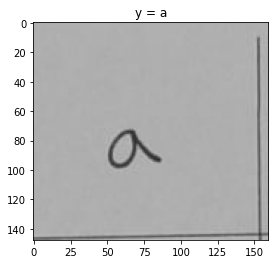

In [32]:
def show_data(data_sample):
    image = cv2.imread(data_sample)
    plt.imshow(image, cmap='gray')
    plt.title('y = ' + data_sample[6]) # Train/letter
    plt.show()

show_data(a_files[1])

## Separating and Labeling Data

In [66]:
all_files = []
train_data = []
labels = []
for letter in os.listdir(train_directory):
    letter_dir = os.path.join(train_directory, letter)
    letter_files = [os.path.join(letter_dir,file) for file in os.listdir(letter_dir) if file.endswith(".jpg")]
    letter_files.sort()
    for sample in letter_files:
        labels.append(letter)
        train_data.append([sample, letter]) # Labeling data given the directory name

print(train_data[100])

['Train/b\\b2.jpg', 'b']


## Train / Test Split

In [67]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(train_data, labels, test_size=0.3)

In [68]:
print(len(trainX))
print(len(testX))
print(len(trainY))
print(len(testY))

1601
687
1601
687


## Linear Classifier

In [ ]:
# Linear classifier here

## CNN

In [69]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self, out_1=2, out_2=1):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=2, padding=0) # Convolution layer
        self.maxpool1=nn.MaxPool2d(kernel_size=2, stride=1) # Max pooling layer
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=2, stride=1, padding=0)
        self.maxpool2=nn.MaxPool2d(kernel_size=2, stride=1)
        self.fc1 = nn.Linear(out_2*7*7, 2) # Fully connected neural network

    def forward(self,x):
        x= self.cnn1(x)
        x = torch.relu(x)
        x - self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1) # 1-D input
        x = self.fc1(x)
        return x